# QUERY 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

datetime64[ns]
AxesSubplot(0.125,0.2;0.775x0.68)


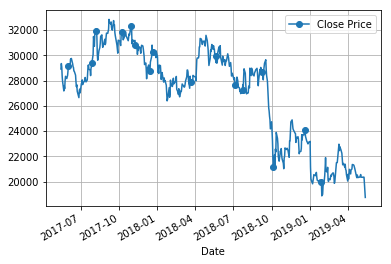

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
r=pd.read_csv(r'C:\Users\RACHIT\Desktop\Intel_Intern\week2.csv')
r['Date']=pd.to_datetime(r['Date'])
print(r['Date'].dtype) # type of data column
tt=r.set_index('Date')
#plt.figure(figsize=(10,10))
#plt.figure(num=1,figsize=(15,6))
print(tt.plot(y='Close Price',grid=True,markevery=[14,53,59,101,115,123,148,153,215,254,287,300,330,347,398,424],marker='o'))
#plt.axis('tight')
# Marks have been plotted on the below graph for drastic change

# QUERY 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

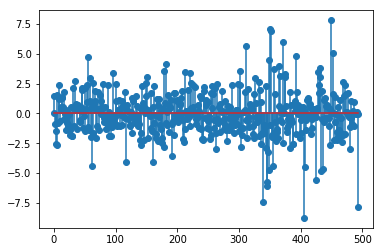

In [23]:
#fig,ax=plt.subplots(1,1)
#ax.plot(r['Open Price'],r['Close Price'])
#ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
%matplotlib inline
p=r.sort_values(['Day_Perc_Change'],ascending=False)
plt.stem(r['Day_Perc_Change'])
#During the second half of the dataset (that during years 2018-2019), the values have been quite high

# QUERY 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

<StemContainer object of 3 artists>

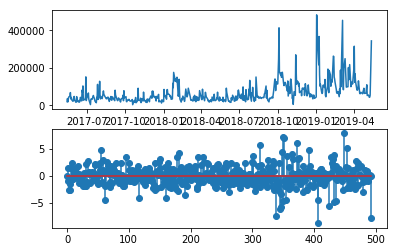

In [24]:
#st=[2,2,3,4,2,2,2]

plt.subplot(2,1,1)
plt.plot(r['Date'],r['Total Traded Quantity'])
plt.subplot(2,1,2)
plt.stem(r['Day_Perc_Change'])
#ANALYSIS
#Thus from the graph we can conclude that volume has been directly proportional to the daily percentage change and 
#this relation is quite strong in the later half of the dataset

# QUERY 2.4
 We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

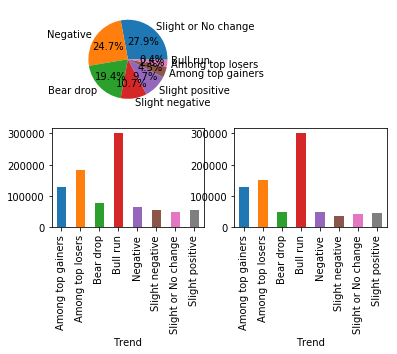

In [50]:
debu=pd.DataFrame({'Count':r['Trend'].value_counts().tolist()})
plt.subplot(2,2,1)
plt.pie(debu['Count'],autopct='%1.1f%%',labels=['Slight or No change','Negative','Bear drop','Slight negative','Slight positive','Among top gainers','Among top losers','Bull run '])
#print(r.groupby(['Trend','Month']).size())
plt.subplot(2,2,3)
r.groupby(['Trend'])['Total Traded Quantity'].mean().plot(kind='bar')
plt.subplot(2,2,4)
r.groupby(['Trend'])['Total Traded Quantity'].median().plot(kind='bar')

# QUERY 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

(array([  3.,   3.,   8.,  29., 153., 198.,  74.,  18.,   5.,   3.]),
 array([-8.76391997, -7.10714935, -5.45037873, -3.79360811, -2.13683749,
        -0.48006687,  1.17670375,  2.83347437,  4.49024498,  6.1470156 ,
         7.80378622]),
 <a list of 10 Patch objects>)

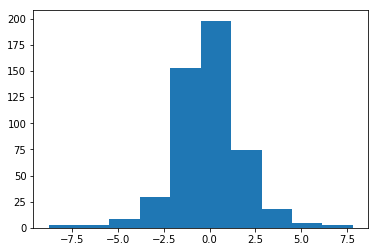

In [51]:
plt.hist(r['Day_Perc_Change'])

# QUERY 2.6
Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks.

,Adani,IDBI,MindTree,SunTv,Voltas
1,8.595041,2.131912,0.363137,-1.918439,0.138937
2,0.761035,-0.913242,-0.968120,-0.855035,-0.520291
3,-3.625378,-7.899934,-2.656265,-1.769912,-3.742445
4,1.567398,-1.715511,0.933252,-2.174786,0.398454
5,-2.932099,-3.709091,0.974874,-0.885734,-0.024053


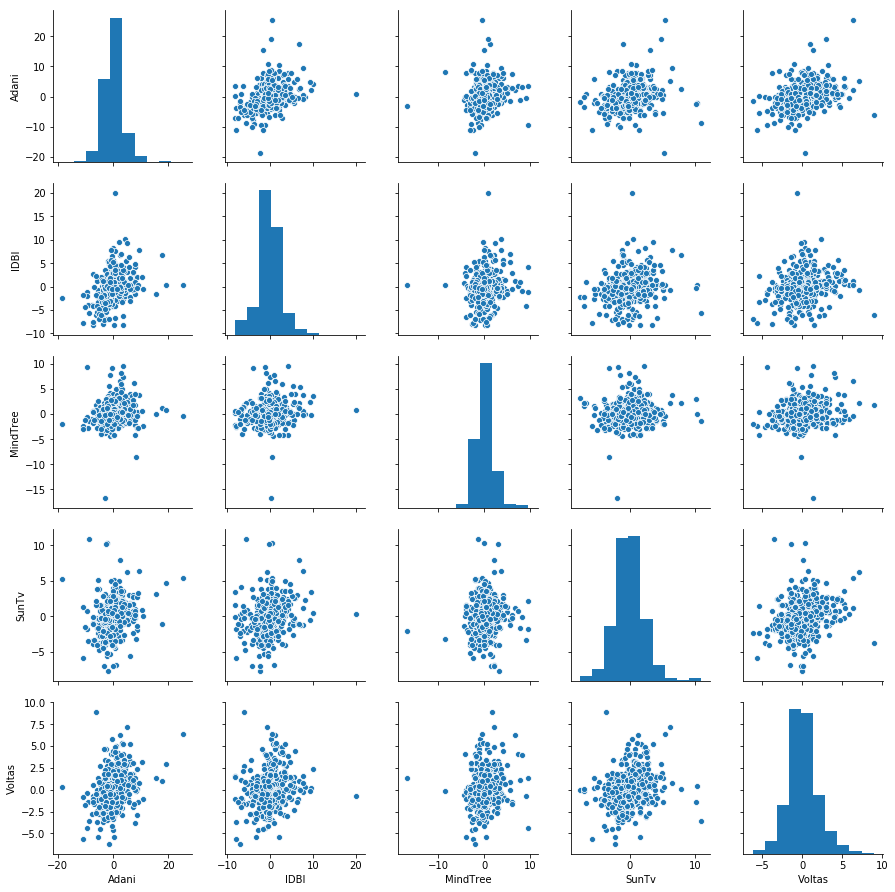

In [55]:
d1=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\ADANIPOWER.csv')
d2=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\IDBI.csv')
d3=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\MINDTREE.csv')
d4=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\SUNTV.csv')
d5=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\VOLTAS.csv')

d1=d1[d1['Series']=='EQ']
d2=d2[d2['Series']=='EQ']
d3=d3[d3['Series']=='EQ']
d4=d4[d4['Series']=='EQ']
d5=d5[d5['Series']=='EQ']
stock=pd.DataFrame({'Adani':d1['Close Price'],'IDBI':d2['Close Price'],'MindTree':d3['Close Price'],'SunTv':d4['Close Price'],'Voltas':d5['Close Price']})
percent=pd.DataFrame({'Adani':d1['Close Price'].pct_change()*100, 'IDBI':d2['Close Price'].pct_change()*100, 'MindTree':d3['Close Price'].pct_change()*100, 'SunTv':d4['Close Price'].pct_change()*100, 'Voltas':d5['Close Price'].pct_change()*100})
percent.dropna(axis=0,inplace=True)
sns.pairplot(percent)
percent.head()

# QUERY 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

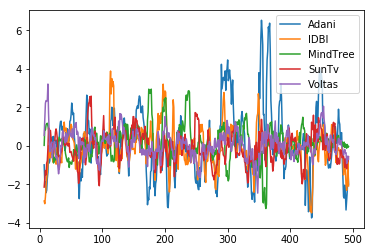

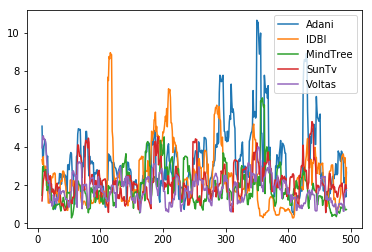

In [56]:
percent.rolling(7).mean().plot()
percent.rolling(7).std().plot()

# QUERY 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' 

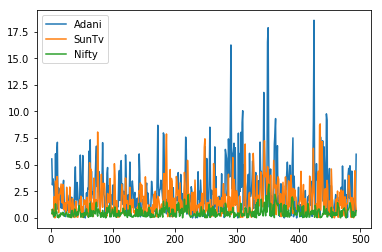

In [57]:

d6=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Nifty50\Nifty50.csv')
percent['Nifty']=d6['Close'].pct_change()*100
percent1=percent.drop(['IDBI','MindTree','Voltas'],axis=1)
percent1.rolling(2).std().plot(kind='line')
#percent

# QUERY 2.9
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

,R21,R34,Call
Date,,,
2017-06-30,28468.679524,28385.140882,Buy
2017-07-03,28412.780952,28343.551176,Buy
2017-07-04,28347.128571,28304.840000,Buy
2017-07-05,28285.433810,28272.212941,Buy
2017-07-28,28335.364286,28254.308235,Buy
2017-07-31,28465.917619,28264.496176,Buy
2017-08-01,28626.459524,28313.201176,Buy
2017-08-02,28797.616190,28382.498824,Buy
2017-08-03,28933.697143,28444.479118,Buy


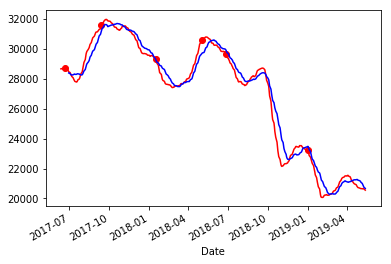

In [58]:
%matplotlib inline
tt['Average Price'].rolling(21).mean().plot(kind='line',color='r',markevery=[28,84,170,240,280,405],marker='o',label='BUY')
tt['Average Price'].rolling(34).mean().plot(kind='line',color='b')
ra1=tt['Average Price'].rolling(21).mean()
ra2=tt['Average Price'].rolling(34).mean()
dataf=pd.DataFrame({'R21':ra1,'R34':ra2})
dataf['Call']=np.zeros(shape=(494))
#x=((ra1>ra2)==True)
q1=dataf[(dataf['R21']>dataf['R34'])==True].replace(0,'Buy')
q2=dataf[(dataf['R21']<dataf['R34'])==True].replace(0,'Sell')
q1=pd.concat([q1,q2])
q1

# QUERY 2.10
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

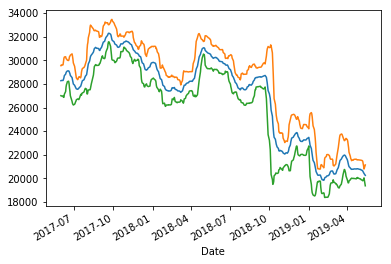

In [62]:
tt['Close Price'].rolling(14).mean().plot()
((tt['Close Price'].rolling(14).mean())+(2*tt['Close Price'].rolling(14).std())).plot(kind='line')
((tt['Close Price'].rolling(14).mean())-(2*tt['Close Price'].rolling(14).std())).plot(kind='line')

In [63]:
norm=tt['Average Price'].rolling(14).mean()
upper=((tt['Average Price'].rolling(14).mean())+(2*tt['Average Price'].rolling(14).std()))
lower=((tt['Average Price'].rolling(14).mean())-(2*tt['Average Price'].rolling(14).std()))
tt['Normal']=norm
tt['Upper']=upper
tt['Lower']=lower
tt.to_csv('random21.csv')